<a href="https://colab.research.google.com/github/h0ssn1/blur-face/blob/main/blurFace_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

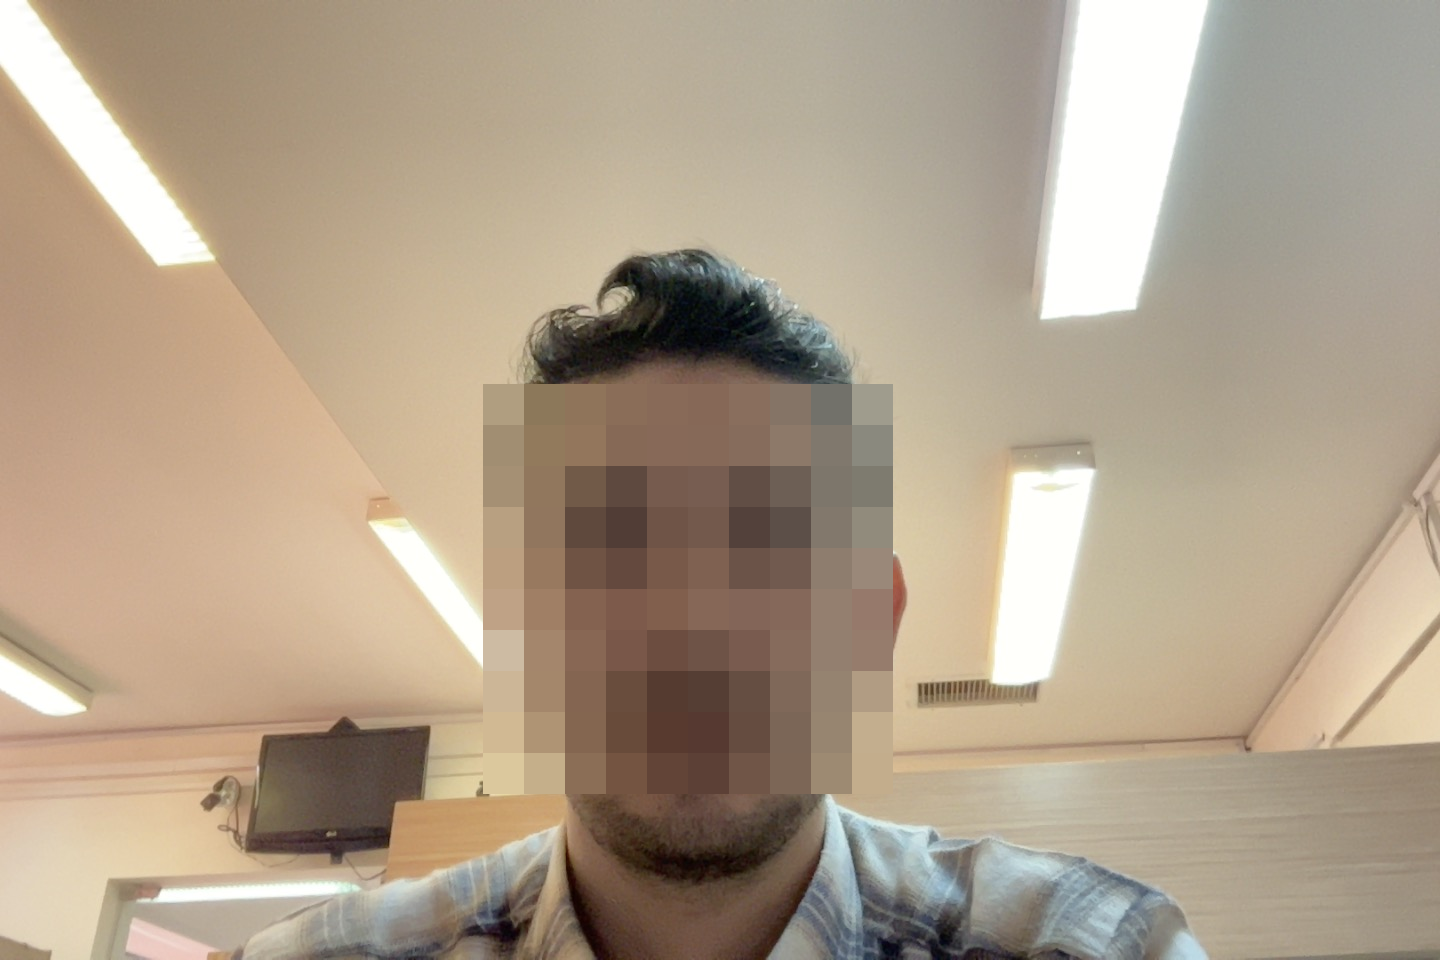

In [25]:
def blur(img, k):
    h, w = img.shape[:2]
    kh, kw = h // k, w // k
    if kh % 2 == 0:
        kh -= 1
    if kw % 2 == 0:
        kw -= 1
    img = cv2.GaussianBlur(img, ksize=(kh, kw), sigmaX=0)
    return img

def pixelate_face(image, blocks=10):
    # divide the input image into NxN blocks
    (h, w) = image.shape[:2]
    xSteps = np.linspace(0, w, blocks + 1, dtype="int")
    ySteps = np.linspace(0, h, blocks + 1, dtype="int")
    # loop over the blocks in both the x and y direction
    for i in range(1, len(ySteps)):
        for j in range(1, len(xSteps)):
            # compute the starting and ending (x, y)-coordinates
            # for the current block
            startX = xSteps[j - 1]
            startY = ySteps[i - 1]
            endX = xSteps[j]
            endY = ySteps[i]
            # extract the ROI using NumPy array slicing, compute the
            # mean of the ROI, and then draw a rectangle with the
            # mean RGB values over the ROI in the original image
            roi = image[startY:endY, startX:endX]
            (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]
            cv2.rectangle(image, (startX, startY), (endX, endY),
                          (B, G, R), -1)
    # return the pixelated blurred image
    return image


factor = 3
image = cv2.imread('/content/Photo on 7-9-1402 AP at 13.16.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.5, 5)

for (x, y, w, h) in faces:
    image[y:y + h, x:x + w] = pixelate_face(blur(image[y:y + h, x:x + w], factor))

cv2_imshow(image)